# Real state -price predictor

In [1]:
import pandas as pd
housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281715,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704437,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008520C44630>,
      dtype=object)

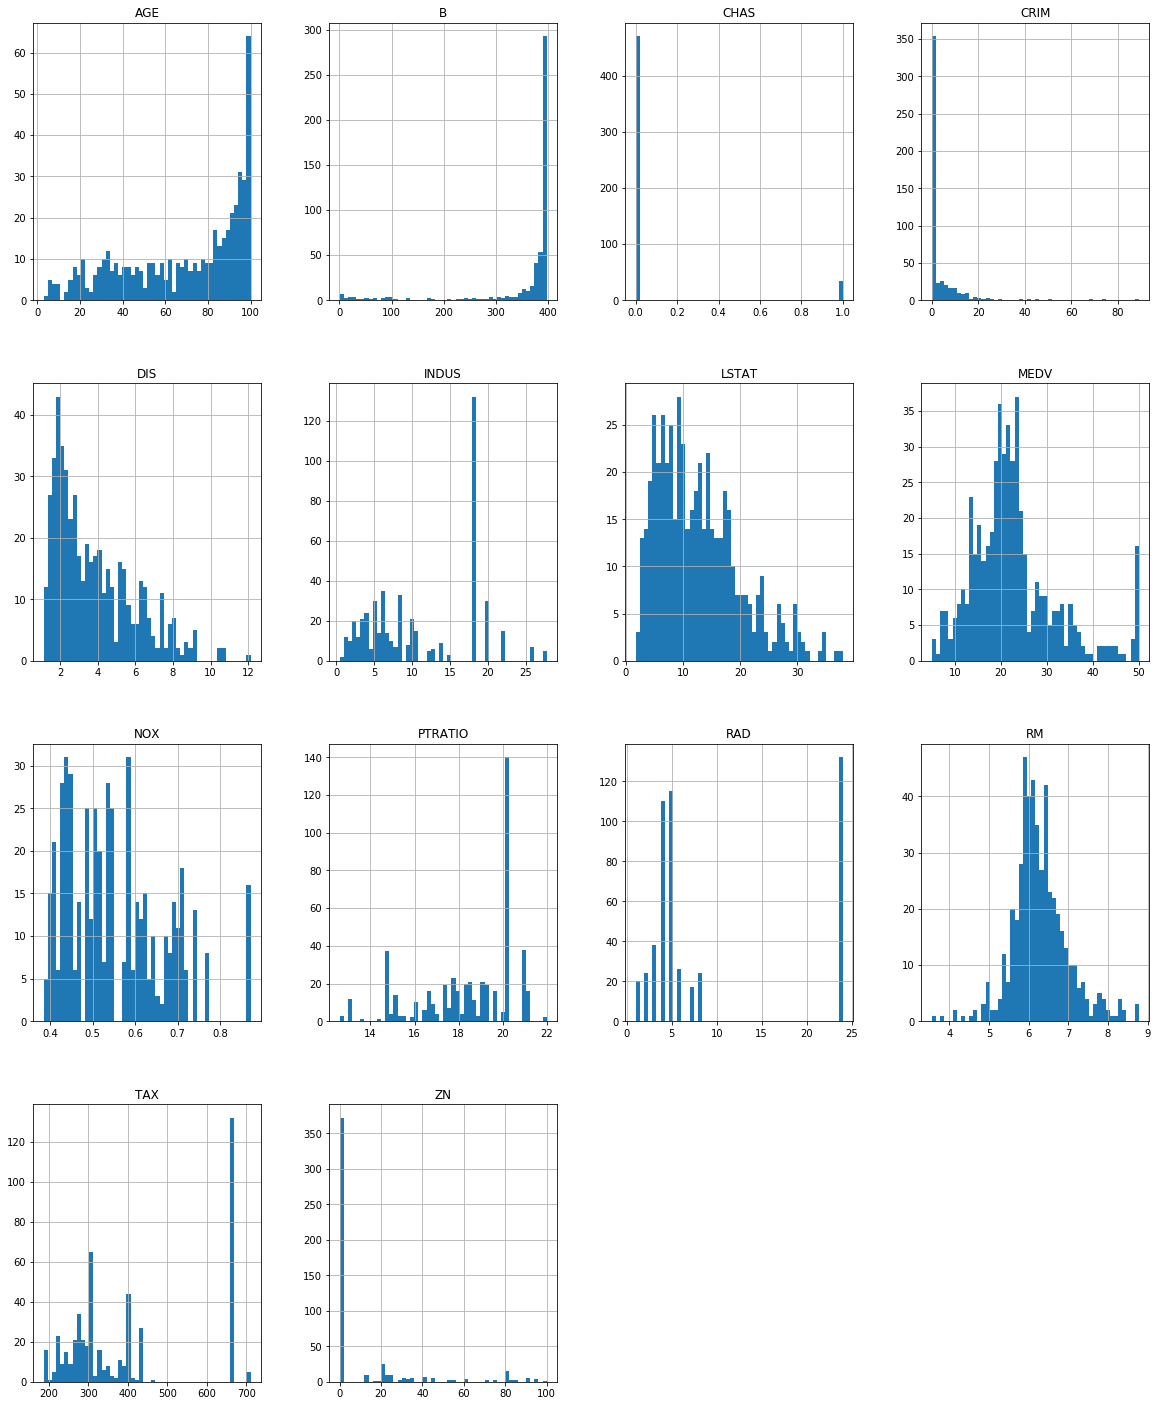

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,25))

## train -test splitting

In [6]:
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [7]:
#train_set , test_set = split_train_test(housing,0.2)
#print(f"rows in train set:{len(train_set)}\n rows in test:{len(test_set)}\n")

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size=0.2,random_state=42)
print(f"rows in train set:{len(train_set)}\n rows in test:{len(test_set)}\n")


rows in train set:404
 rows in test:102



In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]
    

In [10]:
start_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
start_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
start_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
95/7


13.571428571428571

In [14]:
376/28

13.428571428571429

In [15]:
housing = start_train_set.copy()

In [16]:
## looking for correlation

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679509
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000852644C978>,
      dtype=object)

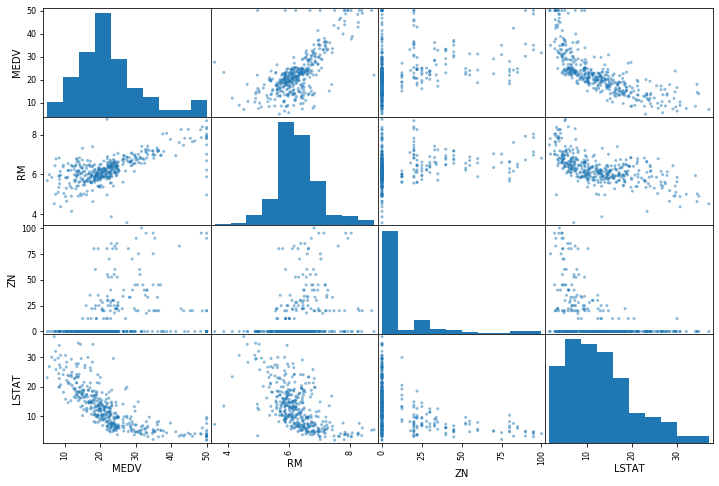

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes], figsize= (12,8))

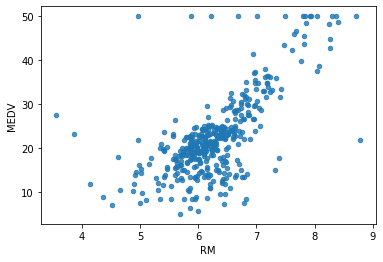

In [19]:
housing.plot(kind ="scatter" , x="RM" , y ="MEDV" , alpha =0.8)

In [20]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679509
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525759
LSTAT     -0.740494
Name: MEDV, dtype: float64

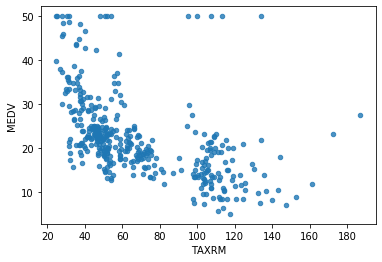

In [23]:
housing.plot(kind ="scatter" , x="TAXRM" , y ="MEDV" , alpha =0.8)

In [24]:
housing = start_train_set.drop('MEDV',axis=1)
housing_labels = start_train_set['MEDV'].copy()

## Missing attrbutes

In [25]:
#To take care of missing attributes , you have three options:
 #   1)get rid off missing data points
 #   2)set rid value of the whole attributes
 #   3)set the value 0, mean, median

In [26]:
a = housing.dropna(subset = ['RM'])
a.shape

(399, 13)

In [27]:
housing.drop('RM',axis = 1).shape

(404, 12)

In [28]:
median = housing['RM'].median()

In [29]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
housing.describe() #before filling missing attr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276183,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715338,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
 imputer.statistics_.shape

(13,)

In [35]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns= housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275351,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710925,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit-learn design

Primarily ,three types of objects
1. Estimators- estimate some parameter boased on data set ex :- inputer (it has a fit and transform method)
fit :- fit the data set and calculate paramenerts

2. transformers :- takens i/p and returns o/p based on the learning on fit() also has a convenience function called fit_transform() which fits and transforms.

3. predictors :- learner regression , 2 common fun fit and pridictor, also give score fun which evalute the prediction.


##Feature scaling

primarily, two types of featire scaling methods:
    1. Min-max scaling (Normalization)
     (value -min)/(max-min)
     sklearn provides a class called minmaxscaler for  this 
    2.Standarazation
       (value-mean)/std
       klearn provides a class called standard scaler for this
       

## creating a pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr
housing_num_tr.shape

(404, 13)

## SELECTING A DESIRE MODEL

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

c:\users\nilanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.95, 26.04, 16.76, 23.65, 23.36])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [42]:
rmse

1.3622862263035027

## cross validation 

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model ,housing_num_tr ,housing_labels , scoring = "neg_mean_squared_error",cv =10 )
rmse_scores = np.sqrt(-scores)


In [44]:
rmse_scores

array([2.85101565, 3.11777203, 4.60214081, 2.6775626 , 3.76450727,
       2.76510578, 4.65194556, 3.49773998, 2.79381862, 3.73441528])

In [45]:
def print_scores(scores):
    print("scores are:",scores)
    print("Mmean:",scores.mean())
    print("stander deviation :",scores.std())
    

In [46]:
print_scores(rmse_scores)

scores are: [2.85101565 3.11777203 4.60214081 2.6775626  3.76450727 2.76510578
 4.65194556 3.49773998 2.79381862 3.73441528]
Mmean: 3.445602359358433
stander deviation : 0.7013890117600587


In [47]:
from joblib import dump,load
dump(model,"Real_state.joblib")


['Real_state.joblib']

## testing the model data

In [48]:
X_test =start_test_set.drop('MEDV', axis=1)
Y_test = start_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions , list(Y_test))

[23.47 11.33 26.35 23.35 18.59 14.32 20.1  15.25 33.08 37.92 18.68 11.82
 26.42 28.05 19.69 12.62 31.96 14.54 23.43 18.08 20.14 18.24 15.48 21.62
 18.12 30.58 17.81 33.5   9.96 33.9  23.46 20.42 23.51 10.41 20.89 11.41
 41.11 24.66 24.29 42.46 23.82 32.6  20.06 21.8  22.21 31.75 42.08 19.95
 20.9  22.35 21.69 14.28 22.53 15.13 23.   33.61 40.36 27.53 19.8  20.46
 45.85 10.36 19.24 24.22 14.77 32.5  19.79 17.46 18.6  32.49 28.67 23.45
 20.86 23.53 34.75 13.91 15.04 21.91 20.76 21.55 22.55 20.15 13.5  22.84
 21.87 20.55 13.93 21.12 21.56 23.65 20.04 29.56  8.24 24.41 20.49 29.47
 19.71 29.46 16.23 27.24 21.5  20.62] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 3

In [49]:
final_rmse

2.996313257530811

In [50]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23569143, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using model

In [51]:
from joblib import dump,load
import numpy as np
model=load("Real_state.joblib")
#import numpy as np
input=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23569143, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([21.95])